# GOLD PRICE PREDICTION PROJECT USING ML 

# 1.DATA PREPROCESSING 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# create data frame to read dataset 

df = pd.read_csv('gld_price_data.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# to check the df structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# find numbers of rows and column

df.shape

(2290, 6)

In [7]:
df.isnull().sum().sum()

0

In [8]:
#describe of numerical columns

df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# 2.DATA VISUALIZATION 

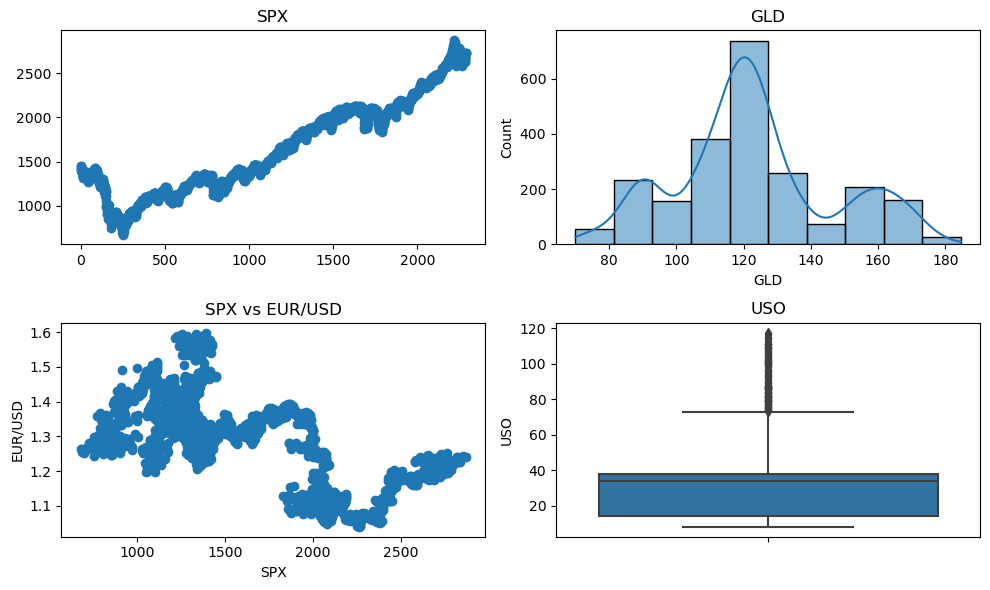

In [9]:
# Plotting
plt.figure(figsize=(10, 6))

# Line plot of SPX over time
plt.subplot(2, 2, 1)
plt.plot(df['SPX'], marker='o', linestyle='-')
plt.title('SPX')

# Distribution plot of GLD
plt.subplot(2, 2, 2)
sns.histplot(df['GLD'], bins=10, kde=True)
plt.title('GLD')

# Scatter plot of SPX vs EUR/USD
plt.subplot(2, 2, 3)
plt.scatter(df['SPX'], df['EUR/USD'], marker='o')
plt.xlabel('SPX')
plt.ylabel('EUR/USD')
plt.title('SPX vs EUR/USD')
# Boxplot of USO
plt.subplot(2, 2, 4)
sns.boxplot(y=df['USO'])
plt.title('USO')

plt.tight_layout()
plt.show()

In [10]:
name3 = list(df.columns[1:])

In [11]:
def plot_seaborn(n1):
    plt.figure(figsize=(13, 8))
    for i in range(len(n1)):
        plt.subplot(2, 3, i+1)
        sns.histplot(df[n1[i]], kde=True)
        plt.title(f'Distribution of {n1[i]}')
    plt.tight_layout()
    plt.show()
    

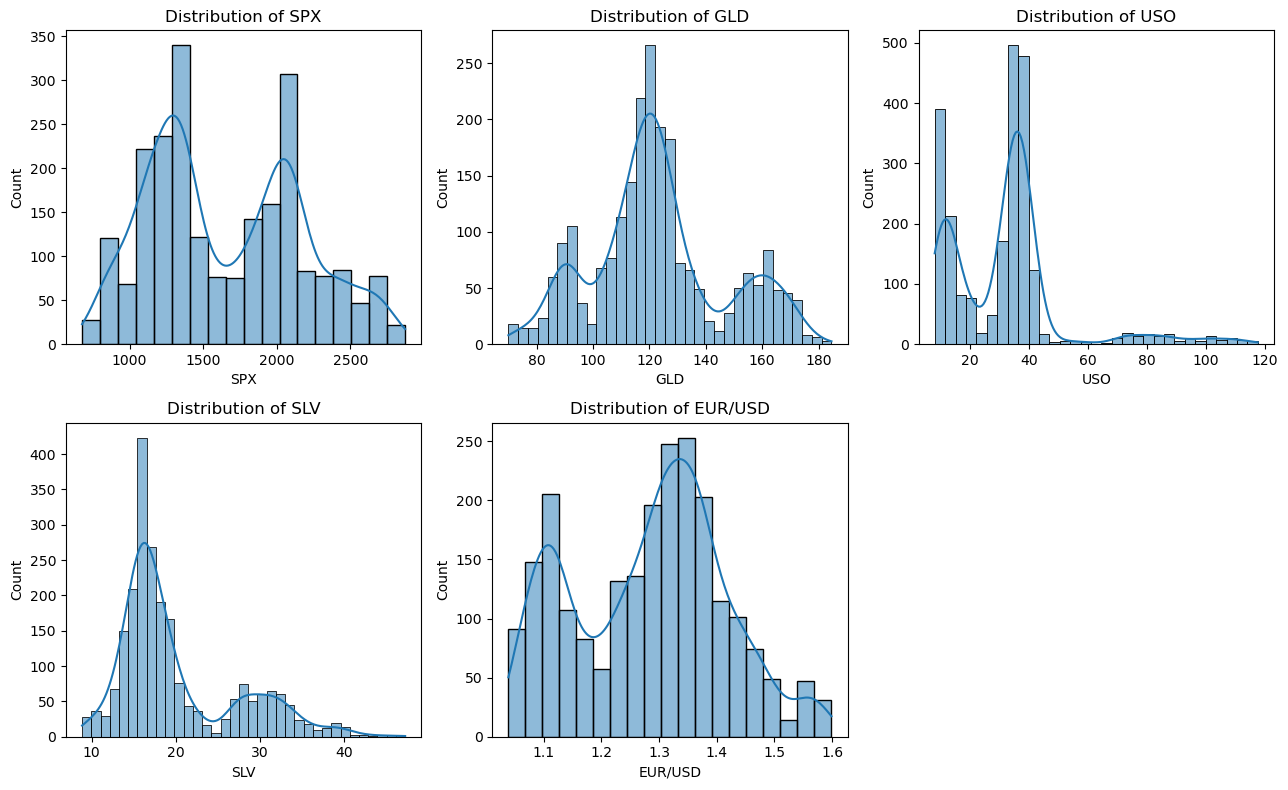

In [12]:
plot_seaborn(name3)

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
correlation = df.corr()

<Axes: >

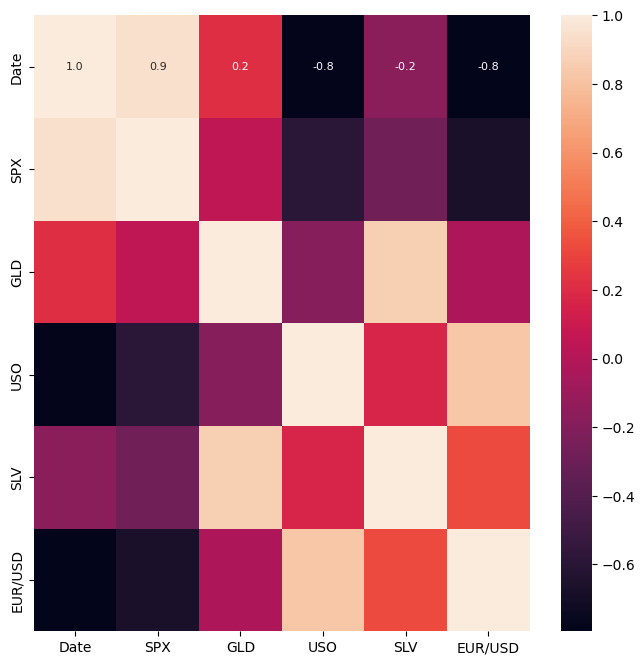

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,annot=True,fmt=".1f",annot_kws={"size":8})

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [17]:
months_dict = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

df['Month Name'] = list(map(lambda x: months_dict[x], df['Month']))

In [18]:
years = []
for i in df['Year']:
    if i not in years:
        years.append(i)
years

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [19]:
def bar_plot(n,num,n2):
    plt.figure(figsize=(20, 25))
    
    for i in range(len(num)):
        plt.subplot(6, 3, i+1)
        
        df4=df3[df3['Year']==num[i]]
        plt.barh(df4['Month Name'],df4[n2])
        plt.title(f'{n} in {num[i]}')
    plt.show()

# 3.Split 

In [20]:
X = df.drop(['Date','GLD','USO','Month Name','Year', 'Month', 'Day'],axis=1)
y= df['GLD']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# 4.Feature Scaling 

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(X)

StandardScaler()

# 5.Ml Models 

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
lr.coef_

array([ 7.50677173e-03,  3.25207608e+00, -4.11803663e+01])

In [28]:
lr.intercept_

97.81069386958859

In [36]:
regressor=DecisionTreeRegressor(criterion='squared_error')
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [37]:
regressor.score(X_test,y_test)

0.9814235538182631

In [40]:
Regressor=RandomForestRegressor(n_estimators=100,criterion='squared_error')
Regressor.fit(X_train,y_train)


RandomForestRegressor()

In [41]:
Regressor.score(X_test,y_test)

0.9900239179122321

In [42]:
y_pred = lr.predict(X_test)
y_pred

array([ 96.60614277, 117.50672308, 120.28404183, 121.92419575,
       165.95827041, 113.7022977 , 112.23441838, 119.87749829,
       132.53693995, 101.86373907, 102.43403995, 156.63797593,
       119.13276757, 109.57594583, 139.23595182, 117.10086488,
       119.82335175, 114.652319  , 150.24067652, 117.71559253,
       121.84188   , 114.76444294,  92.5045015 , 115.35748518,
       101.14816679, 100.97568756, 117.70961245, 153.54370758,
       100.69115825,  97.81646982, 109.76534683,  99.69208027,
       123.05907042, 123.1458489 , 120.84031055, 141.40308368,
       117.28829987, 101.80779899, 120.1148586 , 118.84548127,
       149.29660378, 117.55663211, 120.86397698, 159.5864749 ,
       117.58252411, 158.94950588, 115.19364171, 104.95206653,
       115.69934259,  86.2829705 , 114.02740989, 123.34987825,
       116.00730444, 143.45537335, 162.52125471, 113.99040884,
       100.44150693, 120.62052241, 103.91635081, 101.82087509,
       119.50587681, 150.69311037, 109.53708407, 113.40

In [43]:
y_test

388     100.730003
2271    126.620003
2119    121.919998
1436    125.720001
746     148.589996
           ...    
1195    133.940002
2138    124.360001
2202    123.650002
1880    127.150002
1930    120.160004
Name: GLD, Length: 458, dtype: float64

In [44]:
cv = KFold(n_splits=5 , random_state=100 , shuffle=True)

In [45]:
#for RandomForestRegressor

cross_val_score(estimator=Regressor ,X=X , y = y ,cv = cv)

array([0.98821782, 0.98747936, 0.98992745, 0.98847024, 0.97805597])

In [46]:
y_predict = lr.predict(X_test)
y_predict

array([ 96.60614277, 117.50672308, 120.28404183, 121.92419575,
       165.95827041, 113.7022977 , 112.23441838, 119.87749829,
       132.53693995, 101.86373907, 102.43403995, 156.63797593,
       119.13276757, 109.57594583, 139.23595182, 117.10086488,
       119.82335175, 114.652319  , 150.24067652, 117.71559253,
       121.84188   , 114.76444294,  92.5045015 , 115.35748518,
       101.14816679, 100.97568756, 117.70961245, 153.54370758,
       100.69115825,  97.81646982, 109.76534683,  99.69208027,
       123.05907042, 123.1458489 , 120.84031055, 141.40308368,
       117.28829987, 101.80779899, 120.1148586 , 118.84548127,
       149.29660378, 117.55663211, 120.86397698, 159.5864749 ,
       117.58252411, 158.94950588, 115.19364171, 104.95206653,
       115.69934259,  86.2829705 , 114.02740989, 123.34987825,
       116.00730444, 143.45537335, 162.52125471, 113.99040884,
       100.44150693, 120.62052241, 103.91635081, 101.82087509,
       119.50587681, 150.69311037, 109.53708407, 113.40

In [47]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE = ', mse)
print('RMSE =', rmse)

MSE =  80.5431097550067
RMSE = 8.97458131363278


In [48]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)


In [49]:
len(X_train)

1832

In [50]:
len(X_test)

458

In [51]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [52]:
knn.score(X_test,y_test)

0.9273470854177109

In [56]:
models = [LinearRegression, SVR, DecisionTreeRegressor, KNeighborsRegressor, RandomForestRegressor]
mse_scores = []
rmse_scores = []

for model in models:
    regressor = model().fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(mean_squared_error( y_test, y_pred, squared=False))

In [57]:
regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "SVR", "Decision Tree Regressor", "KNeighborsRegressor", "Random Forest Regressor"],
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Mean Squared Error,Root Mean Squared Error
Model,,
Linear Regression,80.543110,8.974581
SVR,507.520216,22.528209
Decision Tree Regressor,10.871481,3.297193
KNeighborsRegressor,40.332335,6.350774
Random Forest Regressor,5.425910,2.329358
